In [49]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
from scipy.optimize import curve_fit
import datetime

$$H_R = \frac{i\eta\Omega}{2}\left(\sigma_+a+\sigma_-a^\dagger\right)$$
$$H_B = \frac{i\eta\Omega}{2}\left(\sigma_-a+\sigma_+a^\dagger\right)$$

$$\left|0\right>\otimes\left|\overline{n}\right>$$

$$\frac{P_{R, e}(t)}{P_{B, e}(t)-P_{R, e}(t)}$$

$$\overline{n}\approx 5$$

## Read the file

In [83]:
def readFile(filename):
    timeTickFirst, timeTickLast, x, PMT1, PMT1_raw, PMT1_bottom, PMT1_top, PMT2, PMT2_raw, PMT2_bottom, PMT2_top \
      = np.loadtxt(filename, comments='#', delimiter='\t', converters=None, skiprows=0,unpack=True)
    return x, PMT1

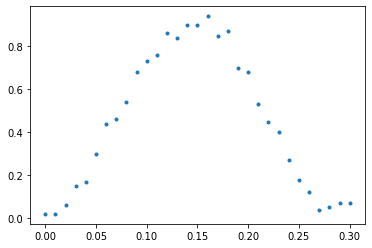

In [84]:
xb, BSB = readFile('RamanTimeScan_CounterProp_BSB_Tilt_650_1')
plt.plot(xb, BSB, '.')

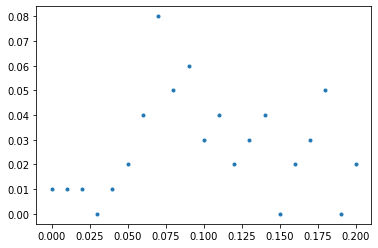

In [85]:
xr, RSB = readFile('RamanTimeScan_CounterProp_RSB_Tilt_650_1')
plt.plot(xr, RSB, '.')

## Define Hamiltonian

In [16]:
times = x
nMax = 20

In [17]:
def H(n, isRed = True, Gamma = 0, etaOmega = 5*2*np.pi, times = times):
    H_R = etaOmega/2*(qt.tensor(qt.sigmap(), qt.destroy(nMax))+qt.tensor(qt.sigmam(), qt.create(nMax)))
    H_B = etaOmega/2*(qt.tensor(qt.sigmam(), qt.destroy(nMax))+qt.tensor(qt.sigmap(), qt.create(nMax)))
    
    psi_0 = qt.tensor(qt.ket2dm(qt.basis(2, 1)), qt.thermal_dm(nMax, n))
    psi_1 = qt.tensor(qt.ket2dm(qt.basis(2, 0)), qt.thermal_dm(nMax, n))

    c_ops = [
                 qt.tensor(qt.qeye(2), np.sqrt(Gamma*(n+1))*qt.destroy(nMax)),          # Heating
                 qt.tensor(qt.qeye(2), np.sqrt(Gamma*n)*qt.create(nMax))]
    
    if isRed == True:
        result = qt.mesolve(H_R, psi_0, times, c_ops, qt.tensor((qt.qeye(2)+qt.sigmaz())/2, qt.qeye(nMax)))
    else:
        result = qt.mesolve(H_B, psi_0, times, c_ops, qt.tensor((qt.qeye(2)+qt.sigmaz())/2, qt.qeye(nMax)))
    
    return result.expect[0]

### Test the Hamiltonian

(0, 1)

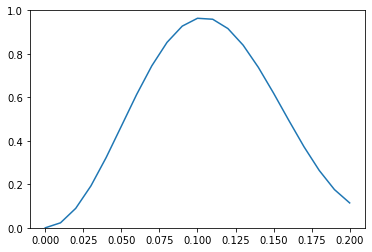

In [78]:
H0 = []
n0 = 0.1
etaOmega = 29
for t in x:
    H0.append(H(n0, False, 0, etaOmega, [0,t])[-1]) # Test Blue sideband
plt.plot(x,H0)
plt.ylim([0,1])

## Define heating rate fit

In [90]:
def Heating(x, a):
    return a * x
def heatingFit(xdata, ydata):
    popt, pcov = curve_fit(Heating, xdata, ydata)
    plt.plot(xdata, Heating(xdata, popt), 'b-',
         label='fit: Heating rate=%5.3f quantas/s' % tuple(popt))
    plt.plot(xdata, ydata, 'r.', label='data')
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Motional quanta')
    plt.show()
    print(popt)

## Method 1: Curve fit

In [79]:
def Red(x, n0, etaOmega):
    return H(n0, True, 0, etaOmega, x)
def Blue(x, n0, etaOmega):
    return H(n0, False, 0, etaOmega, x)

In [80]:
def FitRed(xdata, ydata, guess):
    popt, pcov = curve_fit(Red, xdata, ydata, guess)
    plt.plot(xdata, Red(xdata, *popt), 'r-',
         label='fit: n0=%5.3f, etaOmega=%5.3f' % tuple(popt))
    plt.plot(xdata, ydata, 'b.', label='data')
    plt.legend()
    print(popt)
    return Red(xdata, *popt)
    
def FitBlue(xdata, ydata, guess):
    popt, pcov = curve_fit(Blue, xdata, ydata, guess)
    plt.plot(xdata, Blue(xdata, *popt), 'r-',
         label='fit: n0=%5.3f, etaOmega=%5.3f' % tuple(popt))
    plt.plot(xdata, ydata, 'b.', label='data')
    plt.legend()
    plt.show()
    print(popt)
    return popt

[ 0.05763893 37.33156419]


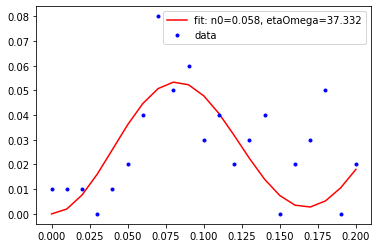

In [86]:
### RSB
xdata = xr
ydata = RSB
guess = np.array([0.1, 30])
RSB_fit = FitRed(xdata, ydata, guess)

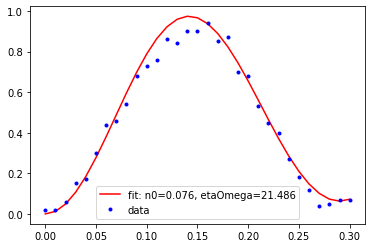

[ 0.07594764 21.48641182]


In [96]:
### BSB
xdata = xb
ydata = BSB
guess = np.array([0.1, 29])
BSB_fit = FitBlue(xdata, ydata, guess)

#### Fit with curve_fit

In [91]:
import os

fnames = []
for root, dirs, files in os.walk("."):
    for filename in files:
        fnames.append(filename)
print(sorted(fnames))

['.DS_Store', 'Error_002.log', 'Heating.xlsx', 'MotionalQuantaFit_PolynomialFit-checkpoint.ipynb', 'MotionalQuantaFit_PolynomialFit.ipynb', 'RamanTimeScan_CounterProp_BSB_Tilt_650_1', 'RamanTimeScan_CounterProp_BSB_Tilt_650_2', 'RamanTimeScan_CounterProp_BSB_Tilt_650_3', 'RamanTimeScan_CounterProp_BSB_Tilt_650_4', 'RamanTimeScan_CounterProp_BSB_Tilt_650_5', 'RamanTimeScan_CounterProp_BSB_Tilt_750_1', 'RamanTimeScan_CounterProp_BSB_Tilt_750_2', 'RamanTimeScan_CounterProp_BSB_Tilt_750_3', 'RamanTimeScan_CounterProp_BSB_Tilt_750_4', 'RamanTimeScan_CounterProp_BSB_Tilt_750_5', 'RamanTimeScan_CounterProp_BSB_Tilt_850_1', 'RamanTimeScan_CounterProp_BSB_Tilt_850_2', 'RamanTimeScan_CounterProp_BSB_Tilt_850_3', 'RamanTimeScan_CounterProp_BSB_Tilt_850_4', 'RamanTimeScan_CounterProp_BSB_Tilt_850_5', 'RamanTimeScan_CounterProp_BSB_Tilt_850_6', 'RamanTimeScan_CounterProp_BSB_Tilt_850_7', 'RamanTimeScan_CounterProp_BSB_Tilt_910_1', 'RamanTimeScan_CounterProp_BSB_Tilt_910_2', 'RamanTimeScan_CounterPr

In [92]:
BSB650 = sorted(fnames)[5:10]
BSB750 = sorted(fnames)[10:15]
BSB850 = sorted(fnames)[15:22]
BSB910 = sorted(fnames)[22:27]
RSB650 = sorted(fnames)[27:32]
RSB750 = sorted(fnames)[32:37]
RSB850 = sorted(fnames)[37:44]
RSB910 = sorted(fnames)[44:49]

print(BSB650)
print(BSB750)
print(BSB850)
print(BSB910)
print(RSB650)
print(RSB750)
print(RSB850)
print(RSB910)

['RamanTimeScan_CounterProp_BSB_Tilt_650_1', 'RamanTimeScan_CounterProp_BSB_Tilt_650_2', 'RamanTimeScan_CounterProp_BSB_Tilt_650_3', 'RamanTimeScan_CounterProp_BSB_Tilt_650_4', 'RamanTimeScan_CounterProp_BSB_Tilt_650_5']
['RamanTimeScan_CounterProp_BSB_Tilt_750_1', 'RamanTimeScan_CounterProp_BSB_Tilt_750_2', 'RamanTimeScan_CounterProp_BSB_Tilt_750_3', 'RamanTimeScan_CounterProp_BSB_Tilt_750_4', 'RamanTimeScan_CounterProp_BSB_Tilt_750_5']
['RamanTimeScan_CounterProp_BSB_Tilt_850_1', 'RamanTimeScan_CounterProp_BSB_Tilt_850_2', 'RamanTimeScan_CounterProp_BSB_Tilt_850_3', 'RamanTimeScan_CounterProp_BSB_Tilt_850_4', 'RamanTimeScan_CounterProp_BSB_Tilt_850_5', 'RamanTimeScan_CounterProp_BSB_Tilt_850_6', 'RamanTimeScan_CounterProp_BSB_Tilt_850_7']
['RamanTimeScan_CounterProp_BSB_Tilt_910_1', 'RamanTimeScan_CounterProp_BSB_Tilt_910_2', 'RamanTimeScan_CounterProp_BSB_Tilt_910_3', 'RamanTimeScan_CounterProp_BSB_Tilt_910_4', 'RamanTimeScan_CounterProp_BSB_Tilt_910_5']
['RamanTimeScan_CounterProp_

The loop fitting doesn't work well because it's highly sensitive to the initial guess. We need to change it mannually

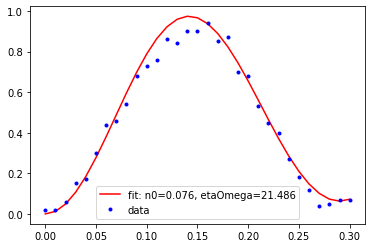

[ 0.07594764 21.48641182]


'T = [0.0, 0.01, 0.03, 0.06, 0.09]\n#n650[3] = 0.698225\nheatingFit(T, n650)\n\nBSB_fit = FitBlue(xdata, ydata, guess)'

In [101]:
n650 = []
for i in range(len(BSB650)):
    if i == 1:
        break
    xb, BSB = readFile(BSB650[i])
    guess = np.array([0.1, 29])
    BSB_fit = FitBlue(xb, BSB, guess)
    n650.append(BSB_fit[0])
'''T = [0.0, 0.01, 0.03, 0.06, 0.09]
#n650[3] = 0.698225
heatingFit(T, n650)

BSB_fit = FitBlue(xdata, ydata, guess)'''

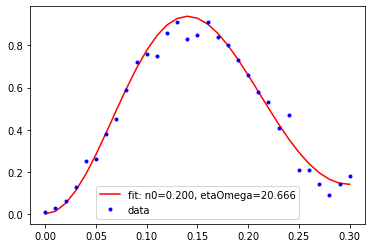

[ 0.19979662 20.6655238 ]


In [105]:
xb, BSB = readFile(BSB650[1])
guess = np.array([0.3, 20])
BSB_fit = FitBlue(xb, BSB, guess)

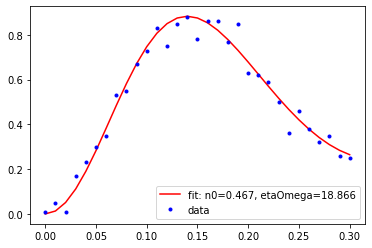

[ 0.46695414 18.86618785]


In [108]:
xb, BSB = readFile(BSB650[2])
guess = np.array([0.4, 20])
BSB_fit = FitBlue(xb, BSB, guess)

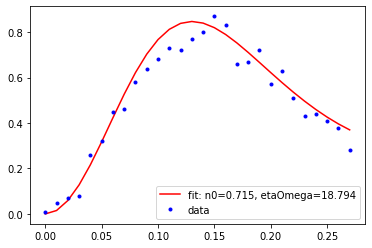

[ 0.71496561 18.79404074]


In [109]:
xb, BSB = readFile(BSB650[3])
guess = np.array([0.6, 20])
BSB_fit = FitBlue(xb, BSB, guess)

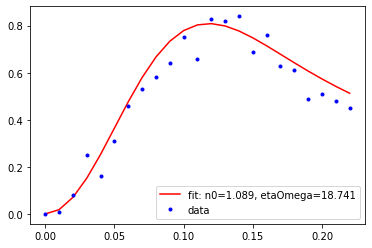

[ 1.08947564 18.74055918]


In [110]:
xb, BSB = readFile(BSB650[4])
guess = np.array([0.9, 20])
BSB_fit = FitBlue(xb, BSB, guess)

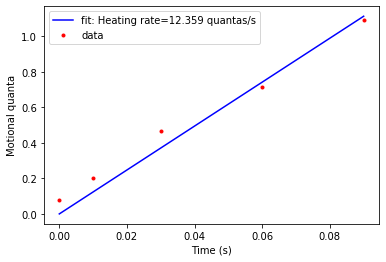

[12.35884524]


In [112]:
n650 = [0.07594764, 0.19979662, 0.46695414, 0.71496561, 1.08947564]
heatingFit(T, n650)

## Method 2: Least square fitting

In [34]:
def LeastSquareFitting(x, ydata, fitdata):
    R = 0
    for i in range(len(x)):
        R += (ydata[i]-fitdata[i])**2
    return R

Test it

In [35]:
n0 = 5
Gamma = 0.1
etaOmega = etaOmega = 5*2*np.pi
H_red = H(n0, True, Gamma, etaOmega)
LeastSquareFitting(x, RSB, H_red)

3.3433825459824194

In [44]:
def ScanParameters(n0s, etaOmegas, xb, BSB):
    R_red = np.zeros((len(n0s), len(etaOmegas))) 
    R_blue = np.zeros((len(n0s), len(etaOmegas)))  
    Gamma = 0
    for i in range(len(n0s)):
        for j in range(len(etaOmegas)):
            #H_red = H(n0s[i], True, Gamma, etaOmegas[j])
            H_blue = H(n0s[i], False, Gamma, etaOmegas[j], times = xb)
            #R_red[i][j] = LeastSquareFitting(x, RSB, H_red)
            R_blue[i][j] = LeastSquareFitting(xb, BSB, H_blue)
    #return R_red, R_blue
    return R_blue

### Start fitting

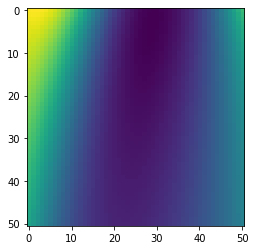

0.06939999999999999
21.6


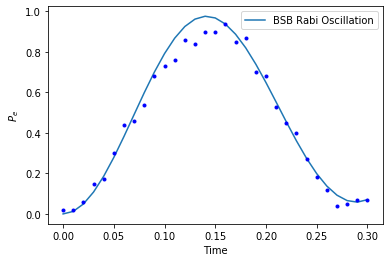

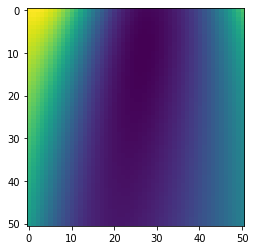

0.18819999999999998
20.8


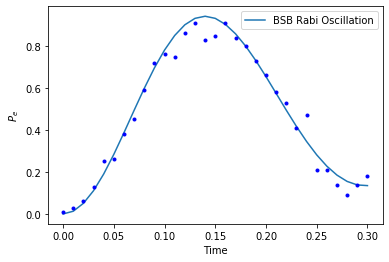

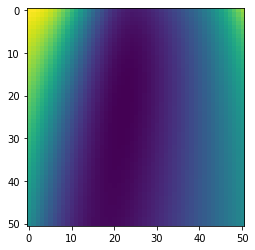

0.4654
18.8


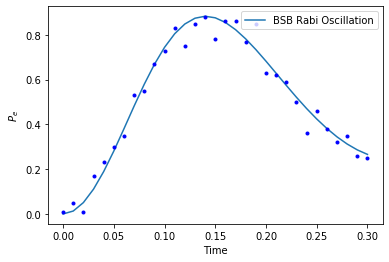

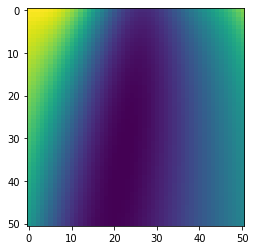

0.7227999999999999
18.8


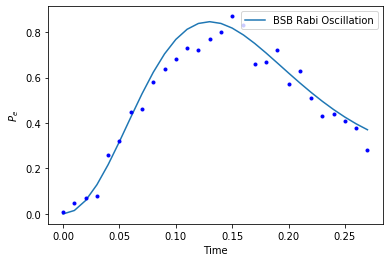

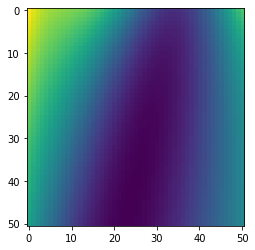

1.0
19.200000000000003


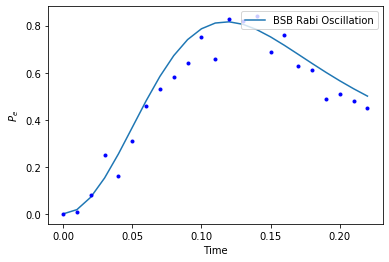

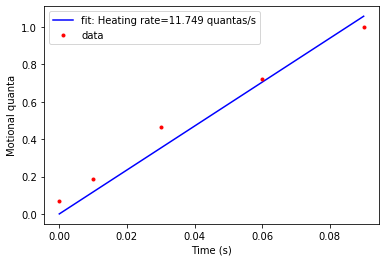

[11.74897638]
0:03:33.758603


In [53]:
# It's important to set the scanning range, it should be reasonable to contain the initial guess.
n0s = np.linspace(0.01, 1, 51)
etaOmegas = np.linspace(10, 30, 51)

now1 = datetime.datetime.now()

n650 = []
for i in range(len(BSB650)):
    xb, BSB = readFile(BSB650[i])
    R_blue = ScanParameters(n0s, etaOmegas, xb, BSB)
    plt.imshow(R_blue)
    plt.show()
    
    row, col = np.where(R_blue == R_blue.min())
    n0 = n0s[row][0]
    etaOmega = etaOmegas[col][0]
    print(n0)
    print(etaOmega)
    
    ax2 = plt.subplot(111)
    ax2.plot(xb, H(n0, False, 0, etaOmega, xb), label = "BSB Rabi Oscillation")
    ax2.plot(xb, BSB, 'b.')
    ax2.set_xlabel("Time")
    ax2.set_ylabel("$P_e$")
    ax2.legend(loc = "upper right")
    plt.show()
    
    
    n650.append(n0)
T = [0.0, 0.01, 0.03, 0.06, 0.09]
#n650[3] = 0.698225
heatingFit(T, n650)
now2 = datetime.datetime.now()
print(now2-now1)

## Write the cell above as a function

In [115]:
# Caution: The time cost will be long if the range of scanning is too large

def lSFit(filenames, n0s, etaOmegas, waitTime):
    # filenames contains the files with different waiting time for one RF setting
    # n0s is the scanning range for motional quanta
    # etaOmegas is the scanning range for eta*Omega
    # waitTime is an array contains corresponding waitTime
    
    
    
    now1 = datetime.datetime.now()

    n = []
    for i in range(len(filenames)):
        xb, BSB = readFile(filenames[i])
        R_blue = ScanParameters(n0s, etaOmegas, xb, BSB)
        plt.imshow(R_blue)
        plt.show()

        row, col = np.where(R_blue == R_blue.min())
        n0 = n0s[row][0]
        etaOmega = etaOmegas[col][0]
        print(n0)
        print(etaOmega)

        ax2 = plt.subplot(111)
        ax2.plot(xb, H(n0, False, 0, etaOmega, xb), label = "BSB Rabi Oscillation")
        ax2.plot(xb, BSB, 'b.')
        ax2.set_xlabel("Time")
        ax2.set_ylabel("$P_e$")
        ax2.legend(loc = "upper right")
        plt.show()


        n.append(n0)
    
    heatingFit(T, n)
    now2 = datetime.datetime.now()
    print(now2-now1)

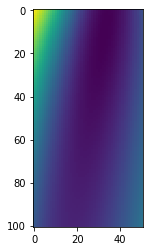

0.09909999999999998
18.6


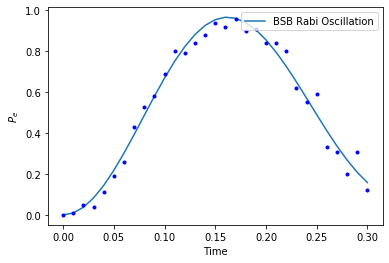

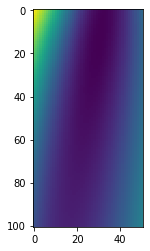

0.11889999999999999
18.2


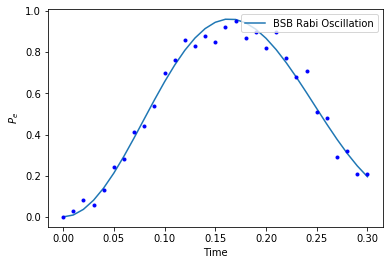

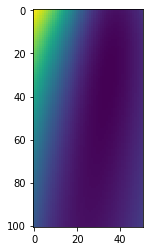

0.3367
18.8


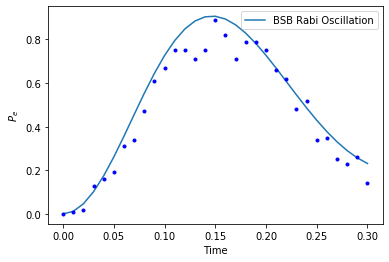

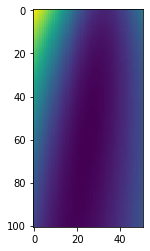

0.604
17.0


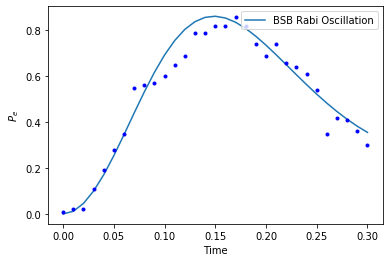

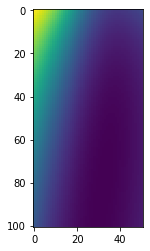

0.8218
18.4


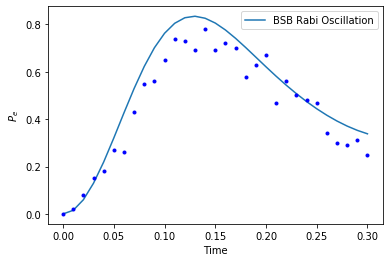

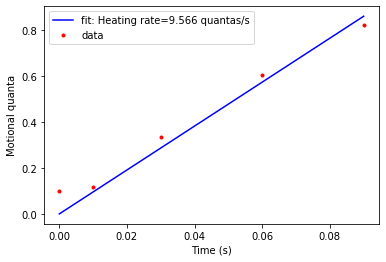

[9.56629921]
0:06:45.877652


In [58]:
n0s = np.linspace(0.01, 1, 101)
etaOmegas = np.linspace(12, 22, 51)
waitTime = [0.0, 0.01, 0.03, 0.06, 0.09]

lSFit(BSB750, n0s, etaOmegas, waitTime)

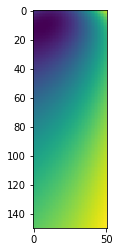

0.23073825503355708
26.6


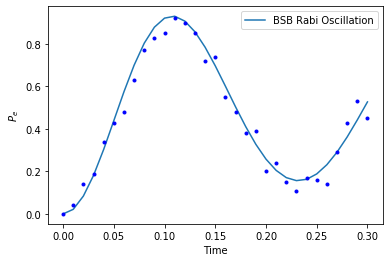

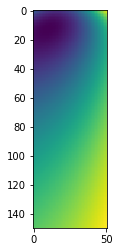

0.2508053691275168
27.0


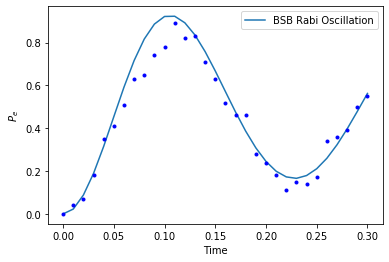

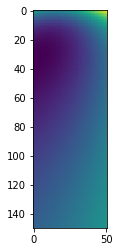

0.6521476510067115
26.2


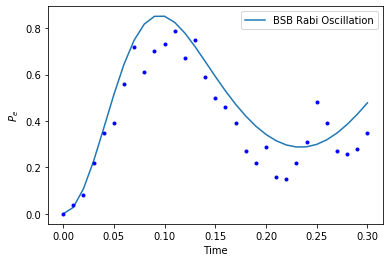

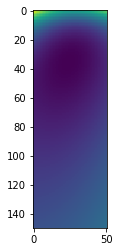

0.7123489932885907
28.4


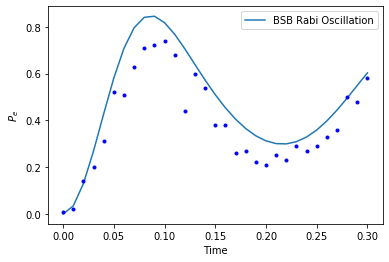

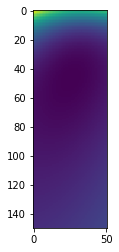

0.9330872483221477
28.6


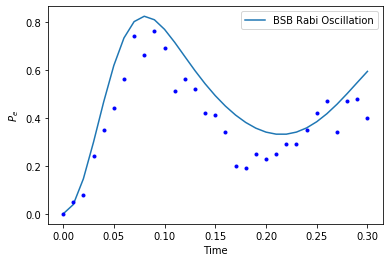

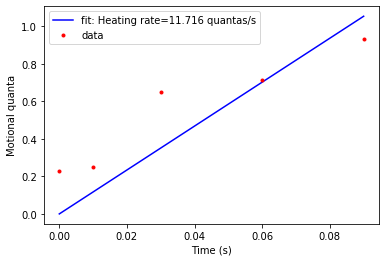

[11.71584844]
0:12:39.319357


In [77]:
n0s = np.linspace(0.01, 3, 150)
etaOmegas = np.linspace(26, 31, 51)
waitTime = [0.0, 0.01, 0.03, 0.06, 0.09]
lSFit(BSB850[:5], n0s, etaOmegas, waitTime)

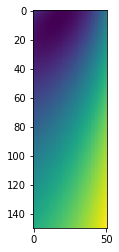

0.08
23.6


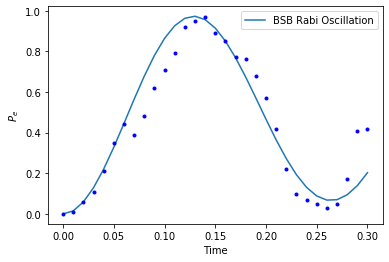

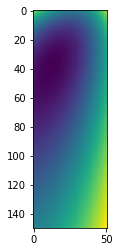

0.4
23.2


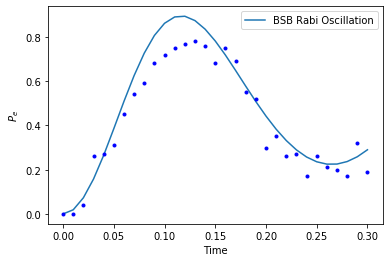

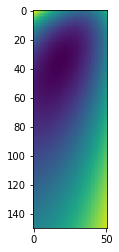

0.36000000000000004
23.8


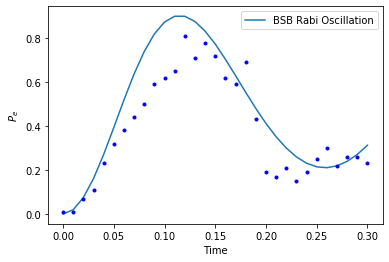

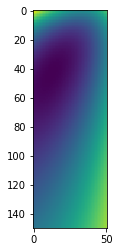

0.45
23.2


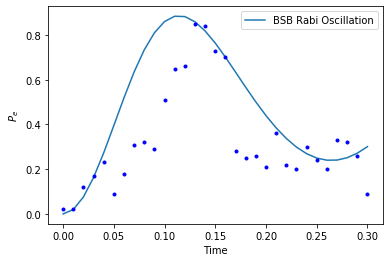

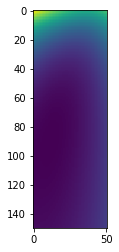

0.91
23.1


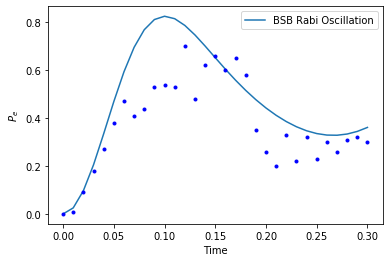

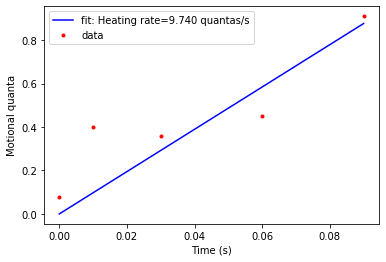

[9.74015747]
0:10:39.534686


In [63]:
n0s = np.linspace(0.01, 1.5, 150)
etaOmegas = np.linspace(22, 27, 51)
waitTime = [0.0, 0.01, 0.03, 0.06, 0.09]
lSFit(BSB910, n0s, etaOmegas, waitTime)

(0, 20)

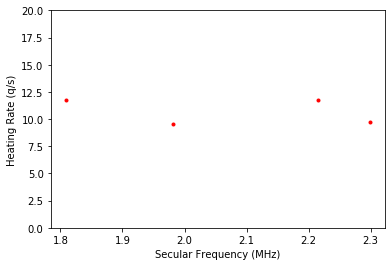

In [116]:
fs = [223.1914,223.0193, 222.7845, 222.7008]
secularF = []
for f in fs:
    secularF.append(225-f)
HeatingRates = [11.7490, 9.5663, 11.716, 9.7402]
plt.plot(finvs, HeatingRates, 'r.')
plt.xlabel('Secular Frequency (MHz)')
plt.ylabel('Heating Rate (q/s)')
plt.ylim([0,20])

### Try to fit the Red sideband by fixing the value of $\eta*\Omega$

In [64]:
def lSRedFit(filenames, n0s, etaOmegas, waitTime):
    
    now1 = datetime.datetime.now()

    n = []
    for i in range(len(filenames)):
        xr, RSB = readFile(filenames[i])
        R_red = ScanParameters(n0s, etaOmegas, xr, RSB)
        plt.imshow(R_red)
        plt.show()

        row, col = np.where(R_red == R_red.min())
        n0 = n0s[row][0]
        etaOmega = etaOmegas[col][0]
        print(n0)
        print(etaOmega)

        ax2 = plt.subplot(111)
        ax2.plot(xr, H(n0, True, 0, etaOmega, xr), label = "RSB Rabi Oscillation")
        ax2.plot(xr, RSB, 'r.')
        ax2.set_xlabel("Time")
        ax2.set_ylabel("$P_e$")
        ax2.legend(loc = "upper right")
        plt.show()

        n.append(n0)
    
    heatingFit(T, n)
    now2 = datetime.datetime.now()
    print(now2-now1)

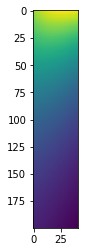

2.0
22.0


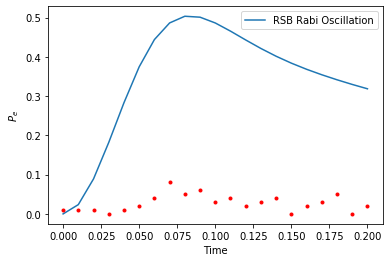

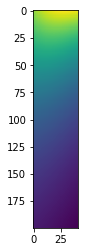

2.0
22.0


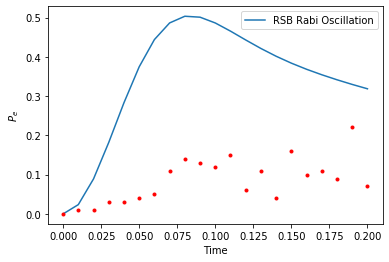

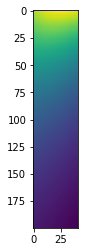

2.0
22.0


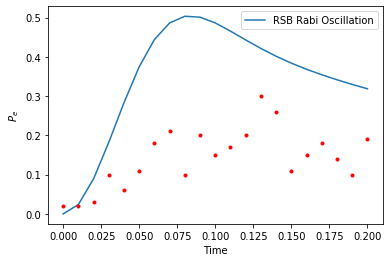

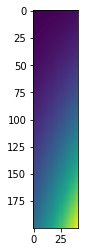

0.01
18.0


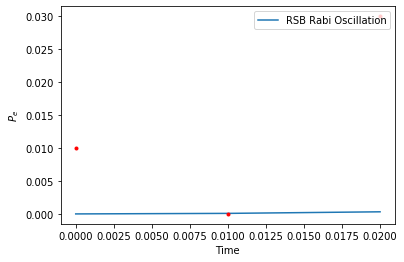

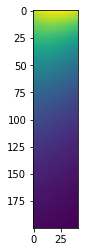

2.0
22.0


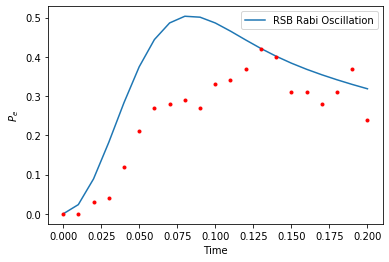

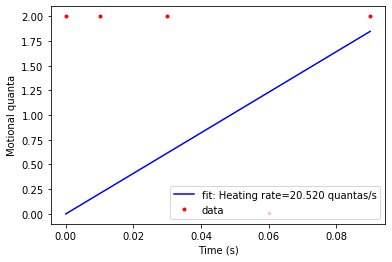

[20.51968496]
0:08:38.442434


In [65]:
n0s = np.linspace(0.01, 2, 200)
etaOmegas = np.linspace(18, 22, 41)
waitTime = [0.0, 0.01, 0.03, 0.06, 0.09]

lSRedFit(RSB650, n0s, etaOmegas, waitTime)

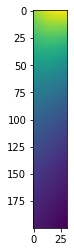

2.0
21.0


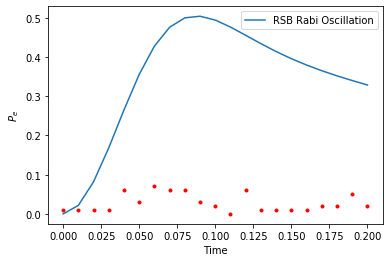

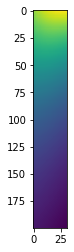

2.0
21.0


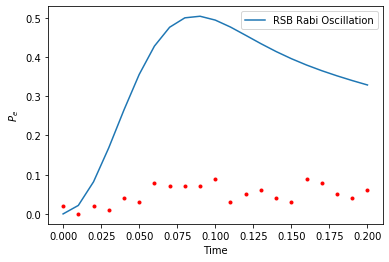

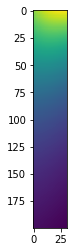

2.0
21.0


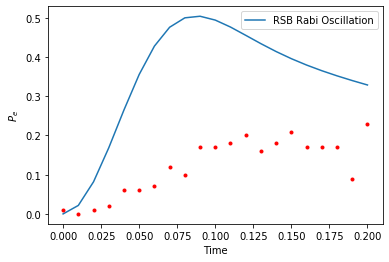

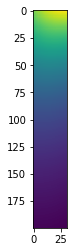

2.0
21.0


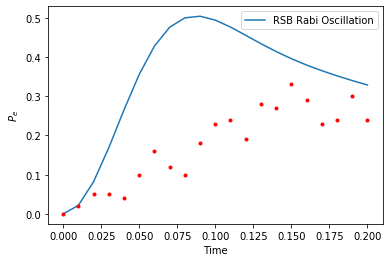

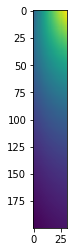

2.0
18.0


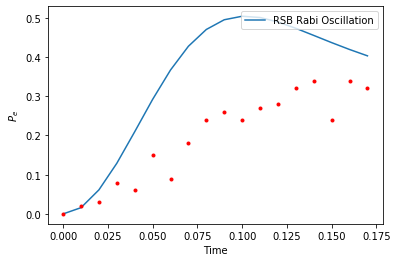

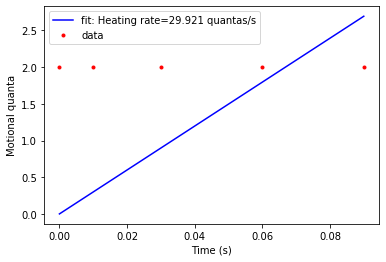

[29.92125982]
0:07:01.264419


In [66]:
n0s = np.linspace(0.01, 2, 200)
etaOmegas = np.linspace(18, 21, 31)
waitTime = [0.0, 0.01, 0.03, 0.06, 0.09]

lSRedFit(RSB750, n0s, etaOmegas, waitTime)